In [29]:
library(tidyverse)
library(ggpubr)
library(GGally)
#library(Seurat)
#library(ggvenn)


DNA <- read_table2("../stat/dna.fq.stat",col_names=F) %>% arrange(X1) %>%rowwise()%>% mutate(X2 = X2/4*300/1000000000) %>% select(X2)

Raw <- read_table2("../stat/raw.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3]) %>% select(X2)
RNA <- read_table2("../stat/rna.fq.stat",col_names=F) %>% arrange(X1) %>% mutate(X2 = X2/4*300/1000000000) %>% select(X2)
raw_pairs <- read_table2("../stat/raw.pairs.stat",col_names=F) %>% arrange(X1) %>% select(X2)
pairs_dedup <- read_table2("../stat/pairs.dedup.stat",col_names=F) %>% arrange(X1) %>% select(X2)
pairs_c1 <- read_table2("../stat/pairs.c1.stat",col_names=F)%>% arrange(X1) %>% select(X2)
pairs_c12 <- read_table2("../stat/pairs.c12.stat",col_names=F)%>% arrange(X1) %>% select(X2)
inter_pairs_c12 <- read_table2(file = "../stat/inter.pairs.c12.stat",col_names = F) %>% arrange(X1) %>% select(X2)
RNAres <- read_table2("../result/RNA_Res/counts.gene.total.tsv")

featureStat <- cbind(as.data.frame(colSums(RNAres %>% select(-gene))),colSums(RNAres %>% select(-gene) != 0))
names(featureStat) <- c("UMIs","genes")
RNAresExon <- read_table2("../result/RNA_Res/counts.exon.total.tsv")

featureStatExon <- cbind(as.data.frame(colSums(RNAresExon %>% select(-gene))),colSums(RNAresExon %>% select(-gene) != 0))
names(featureStatExon) <- c("UMIs","genes")

#stat <- cbind(DNA,Raw,RNA,raw_pairs,pairs_dedup,pairs_c1,pairs_c12,inter_pairs_c12,featureStat)
#names(stat) <- c("cell_name","DNAreads","Rawreads","RNAreads","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2","UMIs_gene","genes_gene")
RNAresGenome1 <- read_table2("../result/RNA_Res/counts.gene.genome1.tsv")
RNAresGenome2 <- read_table2("../result/RNA_Res/counts.gene.genome2.tsv")
featureStatGenome1 <- cbind(as.data.frame(colSums(RNAresGenome1 %>% select(-gene))),colSums(RNAresGenome1 %>% select(-gene) != 0))
featureStatGenome2 <- cbind(as.data.frame(colSums(RNAresGenome2 %>% select(-gene))),colSums(RNAresGenome2 %>% select(-gene) != 0))
RNAstat <- cbind(featureStat,featureStatGenome1,featureStatGenome2)


rmsd <- read_table2("../stat/rmsd.info",col_names = F) %>% arrange(X1) %>% select(X2)
yperx <- read_table2("../stat/yperx.stat",col_names=F) %>% arrange(X1) %>% select(X2)

stat <- cbind(Raw,DNA,RNA,yperx,raw_pairs,pairs_dedup,pairs_c1,pairs_c12,inter_pairs_c12,RNAstat,rmsd)
names(stat) <- c("Rawreads","DNAreads","RNAreads","yperx","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2",
                 "UMIs_gene","genes_gene","UMIs_gene_genome1","genes_gene_genome1","UMIs_gene_genome2","genes_gene_genome2","TOP3_RMS_RMSD")


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [30]:
plot <- stat %>% mutate(RNAreadsRatio = RNAreads/(RNAreads+DNAreads),
                        pairsPerRead = raw_pairs/DNAreads/1000000000*300,
                        pairsValidRatio = pairs_clean2/raw_pairs,
                        interPairsRatio = inter_pairs_clean2/pairs_clean2) 
#%>% filter(str_detect(cell_name,"R"))


In [31]:
plot 

,Rawreads,DNAreads,RNAreads,yperx,raw_pairs,pairs_dedup,pairs_clean1,pairs_clean2,inter_pairs_clean2,UMIs_gene,genes_gene,UMIs_gene_genome1,genes_gene_genome1,UMIs_gene_genome2,genes_gene_genome2,TOP3_RMS_RMSD,RNAreadsRatio,pairsPerRead,pairsValidRatio,interPairsRatio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E752001,1.224936,1.181188,0.0369936,0.27,521389,308184,306555,271724,59274,8908,3708,2805,1612,2567,1496,0.3763213,0.03036789,0.1324232,0.5211541,0.2181405
E752002,1.838257,1.751926,0.0735105,0.21,641759,320922,315023,274330,31342,14215,4554,4580,2166,4248,2099,0.6066013,0.04027008,0.1098949,0.4274658,0.1142493
E752003,2.659534,2.588921,0.0593982,0.31,1072458,342800,337977,300907,53426,7046,2730,2179,1133,2099,1080,0.3103265,0.02242864,0.1242747,0.2805770,0.1775499
E752004,2.256102,2.200616,0.0460368,0.23,1055924,427192,420220,379186,89149,8484,3434,2608,1471,2497,1381,0.2924267,0.02049128,0.1439493,0.3591035,0.2351063
E752005,2.109457,2.059672,0.0413403,0.19,798595,375519,372782,332901,66730,9209,3507,3007,1567,2604,1434,0.3227131,0.01967638,0.1163188,0.4168584,0.2004500
E752006,2.675868,2.609784,0.0554607,0.10,1135448,566588,562659,512943,183810,12566,4144,4066,1910,3685,1802,0.1592718,0.02080886,0.1305221,0.4517538,0.3583439
E752007,2.352888,2.308360,0.0367653,0.04,891182,443332,440330,384740,105643,8559,3784,2615,1620,2559,1584,0.2570747,0.01567733,0.1158202,0.4317188,0.2745828
E752008,2.322668,2.277831,0.0373008,0.03,1108558,494505,491247,443213,87821,7365,3203,2342,1376,2144,1310,0.2622228,0.01611174,0.1460018,0.3998104,0.1981463


In [32]:
plot %>% summary()

    Rawreads        DNAreads        RNAreads           yperx       
 Min.   :1.225   Min.   :1.181   Min.   :0.03677   Min.   :0.0300  
 1st Qu.:2.042   1st Qu.:1.983   1st Qu.:0.03722   1st Qu.:0.0850  
 Median :2.289   Median :2.239   Median :0.04369   Median :0.2000  
 Mean   :2.180   Mean   :2.122   Mean   :0.04835   Mean   :0.1725  
 3rd Qu.:2.430   3rd Qu.:2.379   3rd Qu.:0.05645   3rd Qu.:0.2400  
 Max.   :2.676   Max.   :2.610   Max.   :0.07351   Max.   :0.3100  
   raw_pairs        pairs_dedup      pairs_clean1     pairs_clean2   
 Min.   : 521389   Min.   :308184   Min.   :306555   Min.   :271724  
 1st Qu.: 759386   1st Qu.:337330   1st Qu.:332238   1st Qu.:294263  
 Median : 973553   Median :401356   Median :396501   Median :356044  
 Mean   : 903164   Mean   :409880   Mean   :405849   Mean   :362493  
 3rd Qu.:1081483   3rd Qu.:456125   3rd Qu.:453059   3rd Qu.:399358  
 Max.   :1135448   Max.   :566588   Max.   :562659   Max.   :512943  
 inter_pairs_clean2   UMIs_gene   

Warning message in ggcorr(RNAres, legend.size = 14, method = c("everything", "pearson"), :
“data in column(s) 'gene' are not numeric and were ignored”


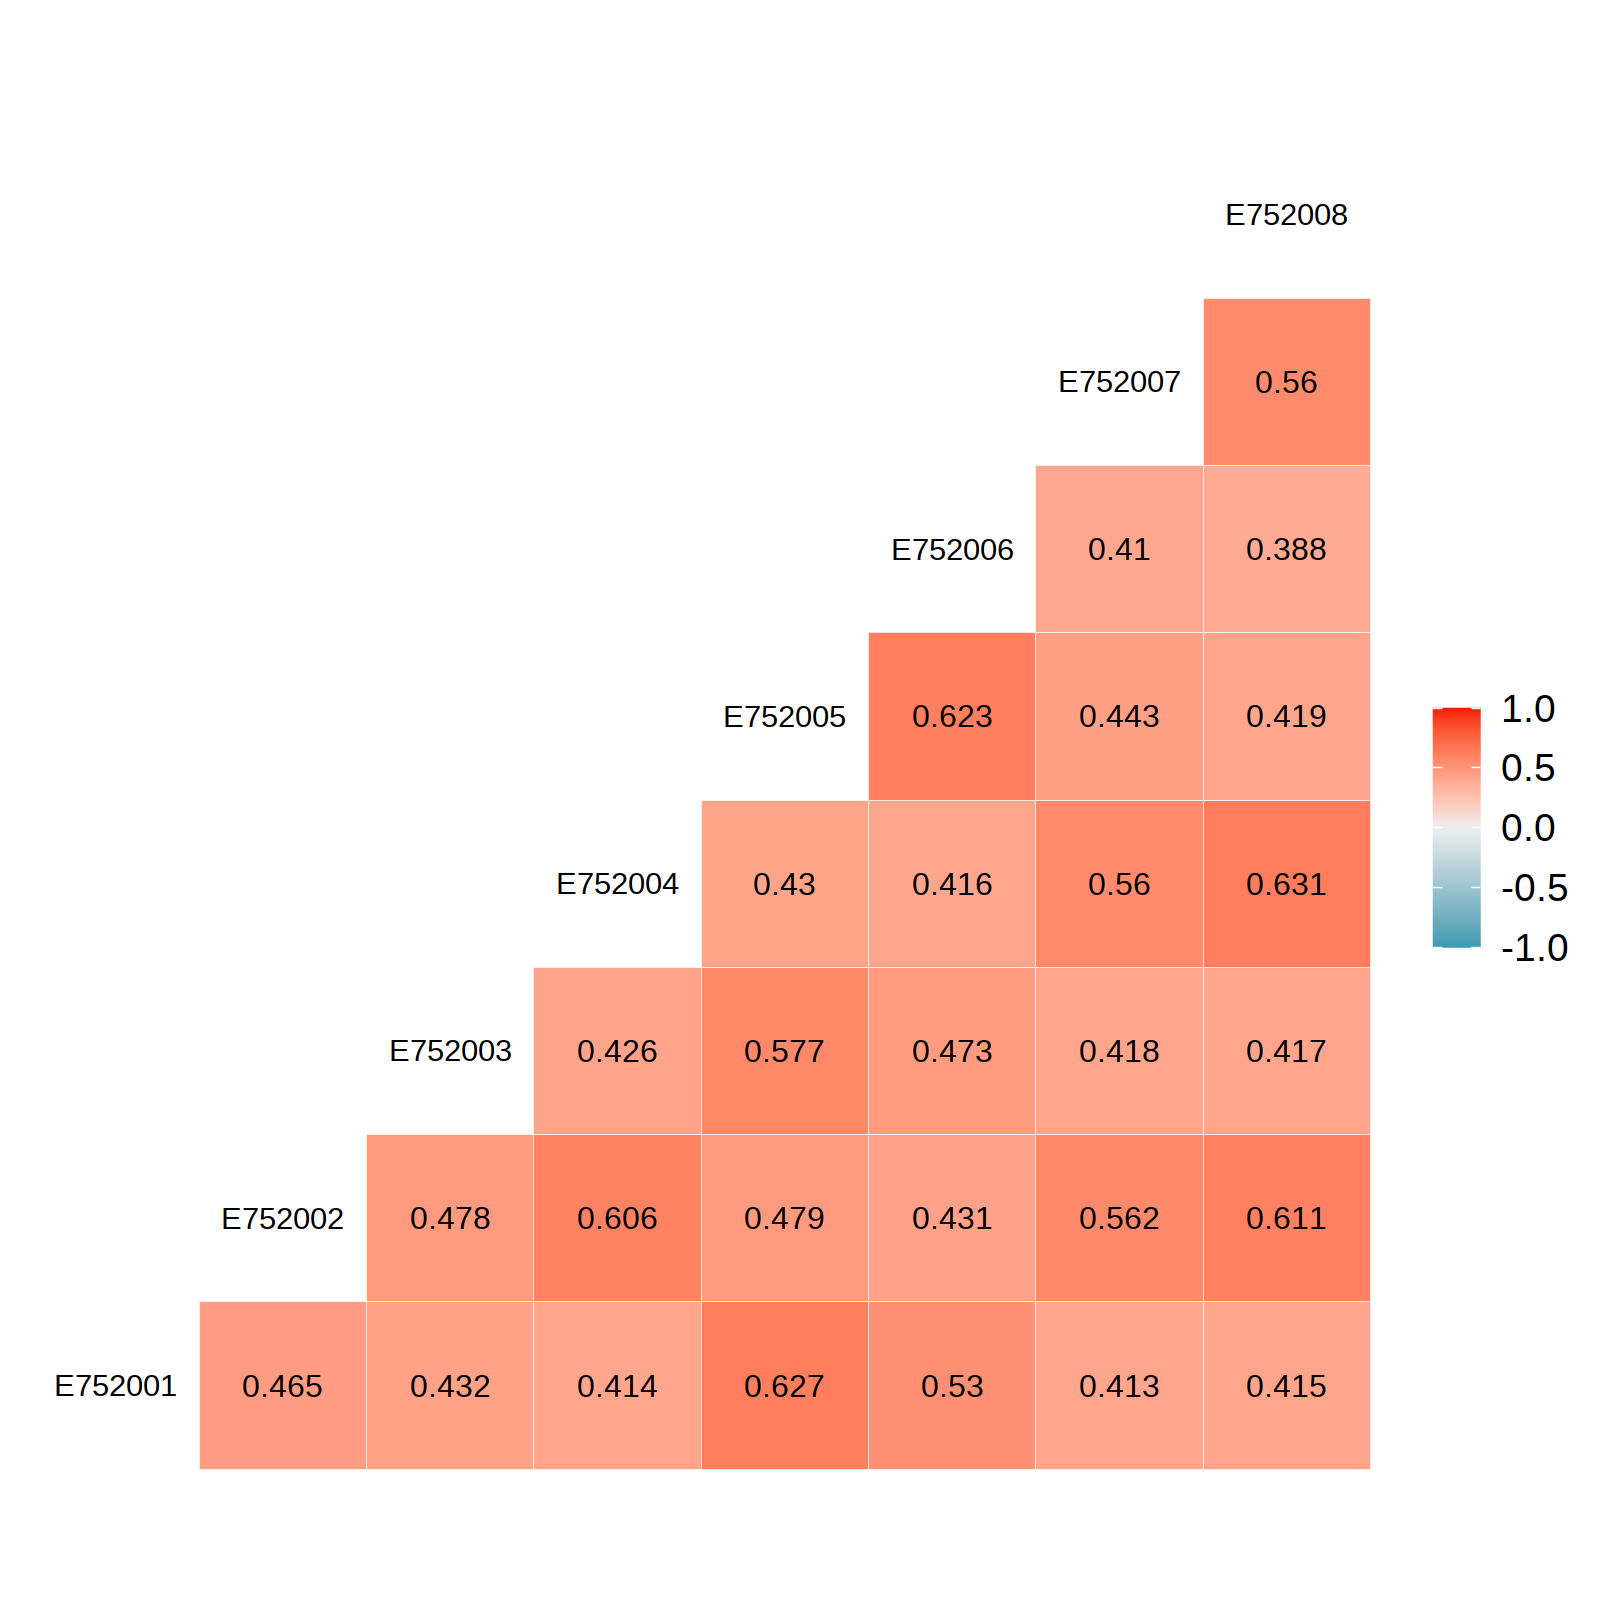

In [33]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 200)
ggcorr(RNAres,legend.size=14,method = c("everything","pearson"),label=T,label_round=3) 